In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Содержание

* [1 Исследование входных данных](#chapter1)
    * [1.1 Описание переменных](#section_1_1)
    * [1.2 Обзор датасета](#section_1_2)
    * [1.3 Изменение признаков](#section_1_3)
* [2 Определение функций моделирования пропусков](#chapter2)
    * [2.1 MCAR](#section_2_1)
    * [2.2 MAR](#section_2_2)
    * [2.3 MNAR](#section_2_3)
    * [2.4 Функция создания набора датасетов с пропусками в каждой переменной](#section_2_4)
* [3 Определение функций для импутации](#chapter3)
    * [3.1 Создание 3 тестовых датасетов (Потом уберу)](#section_3_1)
    * [3.2 Импутация средним](#section_3_2)
    * [3.3 Линейная регрессия](#section_3_3)
    * [3.4 k-ближайших соседей (kNN)](#section_3_4)
    * [3.5 Решающие деревья для классификации](#section_3_5)
    * [3.6 Решающие деревья для регрессии](#section_3_6)
* [4 Создание набора датасетов](#chapter4)
* [5 Применение методов](#chapter5)
    * [5.1 Определение функции для применения методов](#section_5_1)
    * [5.2 Применение функции](#section_5_2)
* [6 Сравнение результатов](#chapter6)
    * [6.1 Создание матриц метрик и определение функции поиска лучших показателей](#section_6_1)
        * [6.1.1 Функция для численных переменных](#sub_section_6_1_1)
        * [6.1.2 Функция для категориальных переменных](#sub_section_6_1_2)
        * [6.1.3 Создание матриц](#sub_section_6_1_3)
            * [6.1.3.1 Матрицы численных метрик](#sub_section_6_1_3_1)
            * [6.1.3.2 Матрицы категориальных метрик](#sub_section_6_1_3_2)
    * [6.2 Обзор матриц](#section_6_2)
* [7 Выводы](#chapter7)

# 1 Исследование исходных данных <a class="anchor" id="chapter1"></a>

## 1.1 Описание переменных <a class="anchor" id="section_1_1"></a>
|Column name|Description                                                                                              |Type|
|-----------|--------------------------------------------------------------------------------------------------------------|-----------------|
|age        |age in years                                                                                                  |Numeric          |
|sex        |sex (1 = male; 0 = female)                                                                                    |Categorical (Bin)|
|cp         |chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)                 |Categorical      |
|trestbps   |resting blood pressure (in mm Hg on admission to the hospital)                                                |Numeric          |
|chol       |serum cholestoral in mg/dl                                                                                    |Numeric          |
|fbs        |fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                         |Categorical (Bin)|
|restecg    |resting electrocardiographic results (0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)    |Categorical      |
|thalach    |maximum heart rate achieved                                                                                   |Numeric          |
|exang      |exercise induced angina (1 = yes; 0 = no)                                                                     |Categorical (Bin)|
|oldpeak    |ST depression induced by exercise relative to rest                                                            |Numeric          |
|slope      |the slope of the peak exercise ST segment (1: upsloping 2: flat 3: downsloping)                               |Categorical      |
|ca         |number of major vessels (0-3) colored by flourosopy (for calcification of vessels)                            |Categorical      |
|thal       |results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)                          |Categorical      |
|num        |target variable representing diagnosis of heart disease (angiographic disease status) in any major vessel (0: < 50% diameter narrowing; 1-4: > 50% diameter narrowing)                                                                     |Categorical    |

## 1.2 Обзор датасета <a class="anchor" id="section_1_2"></a>

In [2]:
cchd_data = pd.read_csv('../../ВКР/Datasets/processed_cleveland.csv')
cchd_data.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [3]:
cchd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [4]:
cchd_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Заменим '?' на моду. Если это были пропуски, то их количество было незначительно.  
Также приведем типы колонок с '?' к int64, чтобы их можно было использовать в дальнейших вычислениях.

In [5]:
print(len(cchd_data.loc[cchd_data['ca'] == '?', 'ca']), len(cchd_data.loc[cchd_data['thal'] == '?', 'thal']), sep='\n')

4
2


In [6]:
cchd_data.loc[cchd_data['ca'] == '?', 'ca'] = cchd_data['ca'].mode().iloc[0]
cchd_data.loc[cchd_data['thal'] == '?', 'thal'] = cchd_data['thal'].mode().iloc[0]
cchd_data = cchd_data.astype({'ca':'int64', 'thal': 'int64'})

In [7]:
cchd_data.shape

(303, 14)

<AxesSubplot:>

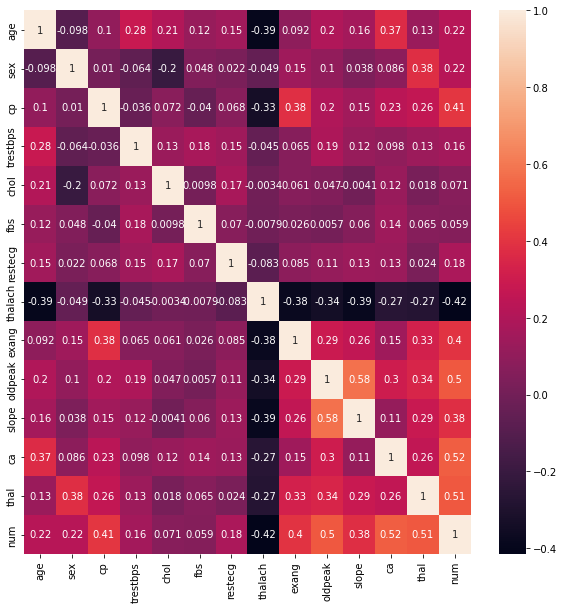

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(cchd_data.corr(), annot=True)

In [9]:
cchd_data.corr().sum()

age         2.547800
sex         1.646021
cp          2.484241
trestbps    2.352104
chol        1.705724
fbs         1.729190
restecg     2.214514
thalach    -1.978588
exang       2.894480
oldpeak     3.534107
slope       2.883748
ca          3.246629
thal        3.455594
num         4.218131
dtype: float64

## 1.3 Изменение признаков <a class="anchor" id="section_1_3"></a>

Иногда может не повезти так, что из-за отсутствия работы с фичами алгоритмы ML в этом ноутбуке не то что выдают плохой результат, а вообще не запускаются. По-хорошему, это бы автоматизировать...  
Чтобы это исправить нужно:  
* В категориальных переменных подавить классы, имеющие очень мало меток (например, около 15);


|Column name|Description                                                                                |Changed to |Type|
|-----------|-------------------------------------------------------------------------------------------|-----------|----|
|cp         |chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)|(1:angina; 2: non-anginal pain; 3: asymptomatic) |Categorical|
|fbs        |fasting blood sugar > 120 mg/dl (1 = true; 0 = false)|Dropped|Categorical (Bin)|
|restecg    |resting electrocardiographic results (0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)|(0: normal; 1: showing probable or definite left ventricular hypertrophy by Estes' criteria)|Categorical|
|slope      |the slope of the peak exercise ST segment (1: upsloping 2: flat 3: downsloping)|(0: upsloping 1: flat_and_down|Categorical|
|ca         |number of major vessels (0-3) colored by flourosopy (for calcification of vessels)| merged 2 and 3 to 2_plus|Categorical|
|thal       |results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)|(0 = normal;                   1 = defect)|Categorical      |
|num        |target variable representing diagnosis of heart disease (angiographic disease status) in any major vessel (0: < 50% diameter narrowing; 1-4: > 50% diameter narrowing)|merged 3 and 4|Categorical|  

* Список может дополняться)

In [10]:
cchd_data['cp'] = cchd_data['cp'].replace({2: 1, 3: 2, 4: 3})
cchd_data['restecg'] = cchd_data['restecg'].replace({2: 1})
cchd_data = cchd_data.drop(columns=['fbs'])
cchd_data['slope'] = cchd_data['slope'].replace({1: 0, 2: 1, 3: 1})
cchd_data['ca'] = cchd_data['ca'].replace({3: 2})
cchd_data['thal'] = cchd_data['thal'].replace({7: 1, 6: 1, 3: 0})
cchd_data['num'] = cchd_data['num'].replace({4: 3})

# 2 Определение функций моделирования пропусков <a class="anchor" id="chapter2"></a>

## 2.1 MCAR <a class="anchor" id="section_2_1"></a>

In [11]:
def replace_random_elements(array, n):
    flat_array = array.flatten()  # делаем одномерный массив из двумерного
    indices = np.random.choice(flat_array.size, n, replace=False)  # выбираем случайные индексы
    flat_array[indices] = 1  # заменяем выбранные элементы на 1
    return flat_array.reshape(array.shape)  # возвращаем двумерный массив

In [12]:
def make_mcar(dataset, area='All', miss_percent=5):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    area='All' - аргумент, принимающий наименование одного из столбцов dataset в виде строки. В случае, если не указан, пропуски моделируются во всем датасете
    miss_percent=5 - процент моделируемых пропусков в указанной области в виде числа
    '''
    dataset = dataset.copy()
    if area == 'All':
        elements_number = dataset.shape[0] * dataset.shape[1]
        missing_elements_number = round(miss_percent * elements_number / 100)
        real_miss_percent = missing_elements_number / elements_number * 100 # может не равняться miss_percent, т.к. нужно целое кол-во элементов
        
        data_missing_indicator = np.zeros(dataset.shape) # массив индикаторов размером dataset'a
        data_missing_indicator = replace_random_elements(data_missing_indicator, missing_elements_number)
        
        dataset[data_missing_indicator == 1] = np.nan        
    else:
        elements_number = dataset.shape[0]
        missing_elements_number = round(miss_percent * elements_number / 100)
        real_miss_percent = missing_elements_number / elements_number * 100 # может не равняться miss_percent, т.к. нужно целое кол-во элементов
        
        data_missing_indicator = np.zeros(dataset.shape[0]) # массив индикаторов размером dataset'a
        data_missing_indicator = replace_random_elements(data_missing_indicator, missing_elements_number)
        
        dataset.loc[data_missing_indicator == 1, area] = np.nan
        
    print( "'" + area + "'", str(miss_percent) + '%', str(round(real_miss_percent, 3)) + '%', sep='; ', end='.\n')    
    
    return dataset

In [13]:
# Проверка
make_mcar(cchd_data, area='All', miss_percent=25)

'All'; 25%; 25.006%.


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,NaN,NaN,0.0,NaN,1.0,0.0,1.0,0.0
1,67.0,1.0,3.0,NaN,286.0,1.0,108.0,1.0,1.5,1.0,2.0,0.0,2.0
2,67.0,1.0,3.0,120.0,229.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0
3,37.0,1.0,2.0,130.0,250.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,41.0,NaN,1.0,130.0,204.0,1.0,172.0,0.0,1.4,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,NaN,1.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,1.0,0.0,NaN,1.0
299,NaN,1.0,3.0,144.0,193.0,0.0,141.0,0.0,NaN,1.0,NaN,1.0,NaN
300,57.0,1.0,3.0,130.0,131.0,NaN,115.0,NaN,1.2,NaN,1.0,1.0,3.0
301,57.0,0.0,1.0,130.0,236.0,1.0,174.0,NaN,0.0,1.0,NaN,0.0,1.0


## 2.2 MAR <a class="anchor" id="section_2_2"></a>

Прокомментировать переменные с помощью записей из тетради

<AxesSubplot:xlabel='cp', ylabel='Count'>

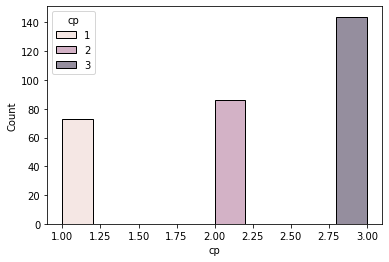

In [14]:
sns.histplot(data=cchd_data, x='cp', hue='cp')

In [15]:
def add_missing_prob(x, area, p_miss):
    if pd.isna(x[area]):
        return x[area]
    else:
        return np.random.choice([x[area], np.nan], p=[1-p_miss[x.name], p_miss[x.name]])

In [16]:
def make_mar(dataset, area, area_dependent, miss_parameter=5, ascending=False, use_prob=False):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    area - аргумент, принимающий наименование одного из столбцов dataset в виде строки, в данном столбце будут созданы пропуски
    area_dependent - аргумент, принимающий наименование одного из столбцов dataset в виде строки, от значений в этом столбце будут зависеть вероятности пропусков в столбце area
    miss_parameter=5 - параметр, применяемый при составлении вектора индикаторов пропусков
    ascending=False - если False, то чем больше значение элемента, тем больше вероятность пропуска
    use_prob=False - если False, то miss_parameter интерпретируется как процент пропусков, которые требуется создать 
    '''
    dataset = dataset.copy()
    
    elements_number = dataset.shape[0]
    missing_elements_number = round(miss_parameter * elements_number / 100)
    
    if use_prob:
        if ascending:
            p_miss = dataset[area_dependent].apply(lambda x: (1 - x / dataset[area_dependent].max()) * miss_parameter / 100)
        else:
            p_miss = dataset[area_dependent].apply(lambda x: x / dataset[area_dependent].max() * miss_parameter / 100)
        dataset[area] = dataset.apply(lambda x: add_missing_prob(x, area, p_miss), axis=1)
        
    else:
        if ascending:
            # По индексу можно получить макс. значение из n чисел для отсротированного Series.unique()
            max_unique_value_id = len(dataset.sort_values(by=area_dependent)[area_dependent].head(missing_elements_number).unique()) - 1
            sorted_series = dataset.sort_values(by=area_dependent).reset_index()[area_dependent]

            miss_n_i = missing_elements_number - len(sorted_series[sorted_series < dataset.sort_values(by=area_dependent)[area_dependent].unique()[max_unique_value_id]])
            miss_b_i = missing_elements_number - miss_n_i

            a = miss_b_i
            b = a + len(sorted_series[sorted_series == dataset.sort_values(by=area_dependent)[area_dependent].unique()[max_unique_value_id]])

            mask_shuffled = ([True] * miss_n_i + [False] * (b - miss_b_i - miss_n_i))
            np.random.shuffle(mask_shuffled)
            mask_shuffled = [True] * a + mask_shuffled + [False] * (elements_number - b) # где True - там делать пропуск
            dataset = dataset.sort_values(by=area_dependent)
        else:
            # По индексу можно получить макс. значение из n чисел для отсротированного Series.unique()
            max_unique_value_id = len(dataset.sort_values(by=area_dependent, ascending=False)[area_dependent].head(missing_elements_number).unique()) - 1
            sorted_series = dataset.sort_values(by=area_dependent, ascending=False).reset_index()[area_dependent]

            miss_n_i = missing_elements_number - len(sorted_series[sorted_series > dataset.sort_values(by=area_dependent, ascending=False)[area_dependent].unique()[max_unique_value_id]])
            miss_b_i = missing_elements_number - miss_n_i

            a = miss_b_i
            b = a + len(sorted_series[sorted_series == dataset.sort_values(by=area_dependent, ascending=False)[area_dependent].unique()[max_unique_value_id]])

            mask_shuffled = ([True] * miss_n_i + [False] * (b - miss_b_i - miss_n_i))
            np.random.shuffle(mask_shuffled)
            mask_shuffled = [True] * a + mask_shuffled + [False] * (elements_number - b) # где True - там делать пропуск
            dataset = dataset.sort_values(by=area_dependent, ascending=False)
        
        
        dataset.loc[mask_shuffled, area] = np.nan
        dataset = dataset.sort_index()
        
    real_miss_percent = len(dataset[dataset[area].isna()]) / elements_number * 100
    print( "'" + area + "'", "'" + area_dependent + "'", miss_parameter, str(round(real_miss_percent, 3)) + '%', sep='; ', end='.\n')    
 
    return dataset

In [17]:
# Проверка
df = make_mar(cchd_data, area='fbs', area_dependent='oldpeak', miss_parameter=30)

'fbs'; 'oldpeak'; 30; 100.0%.


## 2.3 MNAR <a class="anchor" id="section_2_3"></a>

In [18]:
def make_mnar(dataset, area, miss_parameter=5, ascending=False, use_prob=False):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    area - аргумент, принимающий наименование одного из столбцов dataset в виде строки
    miss_parameter=5 - параметр, применяемый при составлении вектора индикаторов пропусков
    ascending=False - если False, то чем больше значение элемента, тем больше вероятность пропуска
    use_prob=False - если False, то miss_parameter интерпретируется как процент пропусков, которые требуется создать
    '''
    dataset = dataset.copy()
    
    elements_number = dataset.shape[0]
    missing_elements_number = round(miss_parameter * elements_number / 100)
 
    if use_prob:
        if ascending:
            p_miss = dataset[area].apply(lambda x: (1 - x / dataset[area].max()) * miss_parameter / 100)
        else:
            p_miss = dataset[area].apply(lambda x: x / dataset[area].max() * miss_parameter / 100)
        dataset[area] = dataset.apply(lambda x: add_missing_prob(x, area, p_miss), axis=1)
    else:
        if ascending:
            # По индексу можно получить макс. значение из n чисел для отсротированного Series.unique()
            max_unique_value_id = len(dataset.sort_values(by=area)[area].head(missing_elements_number).unique()) - 1
            sorted_series = dataset.sort_values(by=area).reset_index()[area]

            miss_n_i = missing_elements_number - len(sorted_series[sorted_series < dataset.sort_values(by=area)[area].unique()[max_unique_value_id]])
            miss_b_i = missing_elements_number - miss_n_i

            a = miss_b_i
            b = a + len(sorted_series[sorted_series == dataset.sort_values(by=area)[area].unique()[max_unique_value_id]])

            mask_shuffled = ([True] * miss_n_i + [False] * (b - miss_b_i - miss_n_i))
            np.random.shuffle(mask_shuffled)
            mask_shuffled = [True] * a + mask_shuffled + [False] * (elements_number - b) # где True - там делать пропуск
            dataset = dataset.sort_values(by=area)
        else:
            # По индексу можно получить макс. значение из n чисел для отсротированного Series.unique()
            max_unique_value_id = len(dataset.sort_values(by=area, ascending=False)[area].head(missing_elements_number).unique()) - 1
            sorted_series = dataset.sort_values(by=area, ascending=False).reset_index()[area]

            miss_n_i = missing_elements_number - len(sorted_series[sorted_series > dataset.sort_values(by=area, ascending=False)[area].unique()[max_unique_value_id]])
            miss_b_i = missing_elements_number - miss_n_i

            a = miss_b_i
            b = a + len(sorted_series[sorted_series == dataset.sort_values(by=area, ascending=False)[area].unique()[max_unique_value_id]])

            mask_shuffled = ([True] * miss_n_i + [False] * (b - miss_b_i - miss_n_i))
            np.random.shuffle(mask_shuffled)
            mask_shuffled = [True] * a + mask_shuffled + [False] * (elements_number - b) # где True - там делать пропуск

            dataset = dataset.sort_values(by=area, ascending=False)

    dataset.loc[mask_shuffled, area] = np.nan
    dataset = dataset.sort_index()
    
    real_miss_percent = len(dataset[dataset[area].isna()]) / elements_number * 100
    print( "'" + area + "'", miss_parameter, str(round(real_miss_percent, 3)) + '%', sep='; ', end='.\n')    
    return dataset

In [19]:
# Проверка
df = make_mnar(cchd_data, area='oldpeak', ascending=False, miss_parameter=49)

'oldpeak'; 49; 48.845%.


## 2.4 Функция создания набора датасетов с пропусками в каждой переменной <a class="anchor" id="section_2_4"></a>

Определим функции таким образом, чтобы каждая из них создавала *c* датасетов для данного механизма пропуска, где *c* - количество переменных-столбцов в принимаемом функцией датасете.  
Создание пропусков MCAR во всем датасете пока игнорируем.

In [20]:
def make_set_of_datasets(dataset, mechanism, name='', miss_parameters=[5, 15, 25]):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    mechanism - механизм пропусков, допускаемых в данном наборе датасетов. Может принимать значение: MCAR, MAR или MNAR
    name='' - название ключей словаря с набором датасетов
    miss_parameters=[5, 15, 25] - список параметров пропуска, принимает 3 параметра, означающих примерные доли пропусков в результирующих наборах
    '''
    dataset = dataset.copy()
    c = dataset.shape[1] # количество переменных в датасете
    df_sets = [] # список словарей
    
    for i in range(3): # создаем 3 набора датасетов, соответственно заданным параметрам пропусков
        df_set = {} # словарь для c датасетов
        keys_set = [f'{name}_{mechanism}{miss_parameters[i]}_{dataset.columns[j]}' for j in range(0, c)] # создаем список ключей для получаемых датафреймов
        for j in range(c): # создаем c датафреймов с пропусками
            if mechanism == 'MCAR':
                df_set[keys_set[j]] = make_mcar(dataset, area=dataset.columns[j], miss_percent=miss_parameters[i])
            elif mechanism == 'MAR':
                df_set[keys_set[j]] = make_mar(dataset, area=dataset.columns[j], area_dependent=dataset.columns[(j - 1) % c], miss_parameter=miss_parameters[i])
            elif mechanism == 'MNAR':
                df_set[keys_set[j]] = make_mnar(dataset, area=dataset.columns[j], miss_parameter=miss_parameters[i])
            else:
                print('Ошибка в названии механизма пропуска')
                return None
        df_sets.append(df_set) # добавляем словарь в список
    return df_sets

In [21]:
test_set = make_set_of_datasets(cchd_data, 'MCAR', 'cchd_data', miss_parameters=[5, 15, 25])

'age'; 5%; 4.95%.
'sex'; 5%; 4.95%.
'cp'; 5%; 4.95%.
'trestbps'; 5%; 4.95%.
'chol'; 5%; 4.95%.
'restecg'; 5%; 4.95%.
'thalach'; 5%; 4.95%.
'exang'; 5%; 4.95%.
'oldpeak'; 5%; 4.95%.
'slope'; 5%; 4.95%.
'ca'; 5%; 4.95%.
'thal'; 5%; 4.95%.
'num'; 5%; 4.95%.
'age'; 15%; 14.851%.
'sex'; 15%; 14.851%.
'cp'; 15%; 14.851%.
'trestbps'; 15%; 14.851%.
'chol'; 15%; 14.851%.
'restecg'; 15%; 14.851%.
'thalach'; 15%; 14.851%.
'exang'; 15%; 14.851%.
'oldpeak'; 15%; 14.851%.
'slope'; 15%; 14.851%.
'ca'; 15%; 14.851%.
'thal'; 15%; 14.851%.
'num'; 15%; 14.851%.
'age'; 25%; 25.083%.
'sex'; 25%; 25.083%.
'cp'; 25%; 25.083%.
'trestbps'; 25%; 25.083%.
'chol'; 25%; 25.083%.
'restecg'; 25%; 25.083%.
'thalach'; 25%; 25.083%.
'exang'; 25%; 25.083%.
'oldpeak'; 25%; 25.083%.
'slope'; 25%; 25.083%.
'ca'; 25%; 25.083%.
'thal'; 25%; 25.083%.
'num'; 25%; 25.083%.


In [22]:
test_set[2]['cchd_data_MCAR25_age']

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,1,145,233,1,150,0,2.3,1,0,1,0
1,NaN,1,3,160,286,1,108,1,1.5,1,2,0,2
2,67.0,1,3,120,229,1,129,1,2.6,1,2,1,1
3,NaN,1,2,130,250,0,187,0,3.5,1,0,0,0
4,NaN,0,1,130,204,1,172,0,1.4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,1,110,264,0,132,0,1.2,1,0,1,1
299,NaN,1,3,144,193,0,141,0,3.4,1,2,1,2
300,57.0,1,3,130,131,0,115,1,1.2,1,1,1,3
301,57.0,0,1,130,236,1,174,0,0.0,1,1,0,1


# 3 Определение функций для импутации <a class="anchor" id="chapter3"></a>

Создадим var_map, она используется в некоторых функциях, которые будут определены далее.

In [23]:
cchd_var_map = {'age': 'num',
                'sex': 'bin',
                'cp': 'cat',
                'trestbps': 'num',
                'chol': 'num',
                'restecg': 'bin',
                'thalach': 'num',
                'exang': 'bin',
                'oldpeak': 'num',
                'slope': 'bin',
                'ca': 'cat',
                'thal': 'bin',
                'num': 'cat'}

## 3.1 Создание 3 тестовых датасетов (Потом уберу) <a class="anchor" id="section_3_1"></a>

In [24]:
cchd_mar_num15_test = make_mar(cchd_data, area='thalach', area_dependent='age', miss_parameter=15)
# вектор истинных значений
num_test_mask_null = cchd_mar_num15_test['thalach'].isnull()
num_true = np.array(cchd_data.loc[num_test_mask_null == True, 'thalach']).reshape(-1, 1) # берем только те строки, в которых в column пропуск
print('num_true.shape:', num_true.shape, end='\n\n')


cchd_mar_cat15_b_test = make_mar(cchd_data, area='exang', area_dependent='thalach', miss_parameter=15)
# вектор истинных значений
cat_b_test_mask_null = cchd_mar_cat15_b_test['exang'].isnull()
cat_b_true = np.array(cchd_data.loc[cat_b_test_mask_null == True, 'exang']).reshape(-1, 1) # берем только те строки, в которых в column пропуск
print('cat_b_true.shape:', cat_b_true.shape, end='\n\n')

cchd_mar_cat15_m_test = make_mar(cchd_data, area='cp', area_dependent='thalach', miss_parameter=15)
# вектор истинных значений
cat_m_test_mask_null = cchd_mar_cat15_m_test['cp'].isnull()
cat_m_true = np.array(cchd_data.loc[cat_m_test_mask_null == True, 'cp']).reshape(-1, 1) # берем только те строки, в которых в column пропуск
print('cat_m_true.shape:', cat_m_true.shape)

'thalach'; 'age'; 15; 14.851%.
num_true.shape: (45, 1)

'exang'; 'thalach'; 15; 14.851%.
cat_b_true.shape: (45, 1)

'cp'; 'thalach'; 15; 14.851%.
cat_m_true.shape: (45, 1)


## 3.2 Импутация средним <a class="anchor" id="section_3_2"></a>

В теории можно добавить разброс в пределах среднеквадратической ошибки, но целесообразность и доказанность под вопросом

In [25]:
def impute_average(dataset, column, mode='median', verbose=True):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    mode='median' - значение, которым восстанавливается столбец, также есть варианты mean, mode
    standard_deviation=False - добавление случайных чисел в пределах стандартного отклонения в массив импутируемых значений
    verbose=True - флаг вывода, если True - то функция будет выводить сообщения на экран
    '''
    dataset = dataset.copy()
    dataset_col = dataset.loc[:, column]
    if mode == 'median':
        imputed_value = dataset_col.median()
    elif mode == 'mean':
        imputed_value = round(dataset_col.mean(), 1)
    elif mode == 'mode':
        imputed_value = dataset_col.mode().iloc[0]
    
    if verbose:
        print('Значение для импутации:', imputed_value)
    
    predict_vector = np.array([imputed_value for i in range(dataset[column].isna().sum())])
    
    dataset[column] = dataset[column].fillna(value=imputed_value)
    
    return dataset

In [26]:
# Восстанавливаем численную переменную медианой
df = impute_average(cchd_mar_num15_test, 'thalach', mode='median')

Значение для импутации: 156.0


In [27]:
# Восстанавливаем численную переменную арифметическим средним
df = impute_average(cchd_mar_num15_test, 'thalach', mode='mean')

Значение для импутации: 151.7


In [28]:
# Восстанавливаем бинарную категориальную переменную модой
df = impute_average(cchd_mar_cat15_b_test, 'exang', mode='mode')

Значение для импутации: 0.0


In [29]:
# Восстанавливаем категориальную переменную модой
df = impute_average(cchd_mar_cat15_m_test, 'cp', mode='mode')

Значение для импутации: 3.0


## 3.3 Линейная регрессия <a class="anchor" id="section_3_3"></a>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Для обучения и тестирования модели лин. регрессии берем исключительно строки без пропуска в целевой переменной.  
Несмотря на то, что исходный датасет не содержит пропусков, и нам известны все значения переменных, в "боевых" условиях у исследователя такой привелегии нет. 

In [31]:
def impute_linreg(dataset, column, verbose=True):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    verbose=True - флаг вывода, если True - то функция будет выводить сообщения на экран
    '''
    dataset = dataset.copy()
    mask_notnull = dataset[column].notnull()
    full_data = dataset.loc[mask_notnull == True, :] # берем только те строки, в которых в column нет пропуска
    y = np.array(full_data.loc[:, column]).reshape(-1, 1)
    
    x = np.array(full_data.loc[:, full_data.columns != column])
    
    missing_data = dataset.loc[mask_notnull == False, :]
    x_pred = np.array(missing_data.loc[:, full_data.columns != column])
    
    # На случай, если разберусь с excluded_columns
    #x_pred = np.array(missing_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    scaler = StandardScaler()
    
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
        
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    if verbose:
        print('Показатели модели:', reg.coef_, reg.intercept_, sep='\n', end='\n\n')
        print(reg.score(x_train, y_train), reg.score(x_test, y_test), sep='\n')
    
    predict_vector = reg.predict(x_pred)
    
    # кривой способ замены вместо pd.fillna()
    miss_n = 0
    for i in range(dataset.shape[0]):
        if pd.isna(dataset.loc[i, column]):
            dataset.loc[i, column] = predict_vector[miss_n]
            miss_n += 1
            
    return dataset

In [32]:
# предикт регрессией
df = impute_linreg(cchd_mar_num15_test, 'thalach')

Показатели модели:
[[-4.18434616  0.2860278  -3.2461627   0.63187686  1.53898697  0.54825687
  -4.47778424  1.10670091 -6.02820422 -0.60904636 -1.61334683 -3.41210325]]
[152.30246438]

0.40656320983028416
0.42226238479746536


## 3.4 k-ближайших соседей (kNN) <a class="anchor" id="section_3_4"></a>

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
def impute_knn(dataset, column, verbose=True):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    verbose=True - флаг вывода, если True - то функция будет выводить сообщения на экран
    '''
    dataset = dataset.copy() # копируем датасет чтобы не вносить изменения по ссылке
    mask_notnull = dataset[column].notnull() # создаем маску, с True на тех позициях, где в dataset[column] нет пропуска
    full_data = dataset.loc[mask_notnull == True, :] # применяем маску чтобы получить срез датасета для обучения и теста
    y = np.array(full_data.loc[:, column]).reshape(-1, 1) # берем таргеты из датасета для обучения
    
    x = np.array(full_data.loc[:, full_data.columns != column]) # составляем массив данных для обучения
    
    missing_data = dataset.loc[mask_notnull == False, :] # срез датасета для восстановления пропусков в dataset
    x_pred = np.array(missing_data.loc[:, full_data.columns != column]) # массив признаков для подстановки в обученную модель
    
    # Нормализация X
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    # Деление выборки на обучающую и тестовую
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    
    knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                                 leaf_size=30, p=2, metric='minkowski', n_jobs=-1)
    
    # "Обучение" модели
    knn_model.fit(x_train, y_train.ravel())
    
    if verbose:
        print(knn_model.score(x_train, y_train), knn_model.score(x_test, y_test), sep='\n')
    
    predict_vector = knn_model.predict(x_pred)
    
    # кривой способ замены pd.fillna()
    miss_n = 0
    for i in range(dataset.shape[0]):
        if pd.isna(dataset.loc[i, column]):
            dataset.loc[i, column] = predict_vector[miss_n]
            miss_n += 1
            
    return dataset

In [35]:
df = impute_knn(cchd_mar_cat15_b_test, 'exang')

0.8238341968911918
0.7230769230769231


In [36]:
df = impute_knn(cchd_mar_cat15_m_test, 'cp')

0.7150259067357513
0.5230769230769231


## 3.5 Решающие деревья для классификации <a class="anchor" id="section_3_5"></a>

In [37]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

In [38]:
def impute_catboost_cat(dataset, column, var_map, catboost_params={}, verbose=100):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    var_map - словарь, спользуется для определения типа классификации и выбора лосс-функции
    catboost_params={} - список параметров catboost
    verbose=100 - флаг вывода, если True - то функция будет выводить сообщения на экран 
    '''
    
    dataset = dataset.copy()
    mask_notnull = dataset[column].notnull()
    full_data = dataset.loc[mask_notnull == True, :] # берем только те строки, в которых в column нет пропуска
    y = np.array(full_data.loc[:, column]).reshape(-1, 1)

    x = np.array(full_data.loc[:, full_data.columns != column])
    
    missing_data = dataset.loc[mask_notnull == False, :]
    x_pred = np.array(missing_data.loc[:, full_data.columns != column])
    
    scaler = StandardScaler()
    
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    
    learn_pool = Pool(
        x_train, 
        y_train
    )
    test_pool = Pool(
        x_test, 
        y_test
    )
 
    catboost_default_params = {
        'iterations': 1000,
        'learning_rate': 0.01,
        'eval_metric': 'TotalF1',
        'leaf_estimation_method': 'Gradient',
        'bootstrap_type': 'Bernoulli'
    }
    
    if var_map[column] == 'cat':
        catboost_default_params['objective'] = 'MultiClass'
    else:
        catboost_default_params['objective'] = 'CrossEntropy'
        
    
    catboost_default_params.update(catboost_params)
 
    catboost = CatBoostClassifier(**catboost_default_params)
    catboost.fit(learn_pool, eval_set=test_pool, verbose=verbose)
    
    predict_vector = catboost.predict(x_pred)
    
    # косая замена pd.fillna()
    miss_n = 0
    for i in range(dataset.shape[0]):
        if pd.isna(dataset.loc[i, column]):
            dataset.loc[i, column] = predict_vector[miss_n]
            miss_n += 1
            
    return dataset

In [39]:
df = impute_catboost_cat(cchd_mar_cat15_b_test, 'exang', cchd_var_map)

0:	learn: 0.7658786	test: 0.7707486	best: 0.7707486 (0)	total: 144ms	remaining: 2m 24s
100:	learn: 0.8954579	test: 0.8153846	best: 0.8295294 (88)	total: 499ms	remaining: 4.44s
200:	learn: 0.9163663	test: 0.8295294	best: 0.8295294 (88)	total: 847ms	remaining: 3.37s
300:	learn: 0.9583161	test: 0.8295294	best: 0.8461538 (222)	total: 1.19s	remaining: 2.77s
400:	learn: 0.9896095	test: 0.8295294	best: 0.8461538 (222)	total: 1.54s	remaining: 2.31s
500:	learn: 0.9948119	test: 0.8437775	best: 0.8461538 (222)	total: 1.9s	remaining: 1.9s
600:	learn: 1.0000000	test: 0.8605241	best: 0.8605241 (568)	total: 2.27s	remaining: 1.5s
700:	learn: 1.0000000	test: 0.8605241	best: 0.8605241 (568)	total: 2.62s	remaining: 1.12s
800:	learn: 1.0000000	test: 0.8437775	best: 0.8605241 (568)	total: 2.98s	remaining: 739ms
900:	learn: 1.0000000	test: 0.8437775	best: 0.8605241 (568)	total: 3.32s	remaining: 365ms
999:	learn: 1.0000000	test: 0.8437775	best: 0.8605241 (568)	total: 3.65s	remaining: 0us

bestTest = 0.860524

In [40]:
df = impute_catboost_cat(cchd_mar_cat15_m_test, 'cp', cchd_var_map)

0:	learn: 0.6596045	test: 0.5602269	best: 0.5602269 (0)	total: 3ms	remaining: 3s
100:	learn: 0.8122149	test: 0.6233181	best: 0.6705739 (5)	total: 201ms	remaining: 1.79s
200:	learn: 0.9021056	test: 0.6140779	best: 0.6705739 (5)	total: 403ms	remaining: 1.6s
300:	learn: 0.9689104	test: 0.5764372	best: 0.6705739 (5)	total: 606ms	remaining: 1.41s
400:	learn: 0.9741271	test: 0.5975201	best: 0.6705739 (5)	total: 832ms	remaining: 1.24s
500:	learn: 0.9896373	test: 0.5729702	best: 0.6705739 (5)	total: 1.07s	remaining: 1.06s
600:	learn: 0.9948065	test: 0.6071438	best: 0.6705739 (5)	total: 1.28s	remaining: 849ms
700:	learn: 1.0000000	test: 0.5848606	best: 0.6705739 (5)	total: 1.5s	remaining: 639ms
800:	learn: 1.0000000	test: 0.5963925	best: 0.6705739 (5)	total: 1.72s	remaining: 428ms
900:	learn: 1.0000000	test: 0.5816768	best: 0.6705739 (5)	total: 1.95s	remaining: 215ms
999:	learn: 1.0000000	test: 0.5816768	best: 0.6705739 (5)	total: 2.15s	remaining: 0us

bestTest = 0.6705738706
bestIteration = 5


## 3.6 Решающие деревья для регрессии <a class="anchor" id="section_3_6"></a>

In [41]:
from catboost import CatBoostRegressor

In [42]:
def impute_catboost_num(dataset, column, catboost_params={}, verbose=100):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    excluded_columns=[] - список колонок, не используемых в обучении
    catboost_params={} - список параметров catboost
    verbose=100 - флаг вывода, если True - то функция будет выводить сообщения на экран
    '''
    
    dataset = dataset.copy()
    mask_notnull = dataset[column].notnull()
    full_data = dataset.loc[mask_notnull == True, :] # берем только те строки, в которых в column нет пропуска
    y = np.array(full_data.loc[:, column]).reshape(-1, 1)

    x = np.array(full_data.loc[:, full_data.columns != column])
    
    missing_data = dataset.loc[mask_notnull == False, :]
    x_pred = np.array(missing_data.loc[:, full_data.columns != column])
    
    scaler = StandardScaler()
    
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    
    learn_pool = Pool(
        x_train, 
        y_train
    )
    test_pool = Pool(
        x_test, 
        y_test
    )
 
    catboost_default_params = {
        'iterations': 1000,
        'learning_rate': 0.01,
        'depth': 2,
        'leaf_estimation_method': 'Gradient',
        'bootstrap_type': 'Bernoulli',
        'objective': 'RMSE',
    }
 
    catboost_default_params.update(catboost_params)
 
    catboost = CatBoostRegressor(**catboost_default_params)
    catboost.fit(learn_pool, eval_set=test_pool, verbose=verbose)
 
    predict_vector = catboost.predict(x_pred)
    
    # косая замена pd.fillna()
    miss_n = 0
    for i in range(dataset.shape[0]):
        if pd.isna(dataset.loc[i, column]):
            dataset.loc[i, column] = predict_vector[miss_n]
            miss_n += 1
            
    return dataset

In [43]:
df = impute_catboost_num(cchd_mar_num15_test, 'thalach')

0:	learn: 22.3769084	test: 22.2956448	best: 22.2956448 (0)	total: 589us	remaining: 588ms
100:	learn: 18.9058650	test: 19.4306537	best: 19.4306537 (100)	total: 40.1ms	remaining: 357ms
200:	learn: 17.5066421	test: 18.6268400	best: 18.6268400 (200)	total: 77.3ms	remaining: 307ms
300:	learn: 16.8865329	test: 18.3568031	best: 18.3559703 (297)	total: 111ms	remaining: 259ms
400:	learn: 16.5098699	test: 18.2246513	best: 18.2246513 (400)	total: 146ms	remaining: 218ms
500:	learn: 16.2311662	test: 18.1650951	best: 18.1645886 (498)	total: 180ms	remaining: 179ms
600:	learn: 15.9629491	test: 18.0721539	best: 18.0704707 (597)	total: 212ms	remaining: 141ms
700:	learn: 15.7019732	test: 17.9866318	best: 17.9866318 (700)	total: 249ms	remaining: 106ms
800:	learn: 15.4828075	test: 17.9177289	best: 17.9177289 (800)	total: 297ms	remaining: 73.7ms
900:	learn: 15.2263977	test: 17.8286843	best: 17.8286843 (900)	total: 330ms	remaining: 36.2ms
999:	learn: 15.0216750	test: 17.7385829	best: 17.7383973 (996)	total: 

[6 Сравнение результатов](#chapter6)  

# 4 Создание набора датасетов <a class="anchor" id="chapter4"></a>

Схема, описывающая датасеты, которые предполагается создать (исходных датасетов - 2):  
![Схема, описывающая датасеты, которые предполагается создать](../Images/datasets_scheme.png)  
СХЕМА НЕРЕЛЕВАНТНА МАТ ПОСТАНОВКЕ

df_set\[*d*\]\['\{name\}_\{mechanism\}\{density\}_\{column\}'\]  
*d*: 0-2 - доля пропусков \(по умолчанию \[5, 15, 25\]\)  
  
\['\{name\}_\{mechanism\}\{density\}_\{column\}'\]:
* name: name, переданный в функцию создания набора
* mechanism: mechanism, переданный в функцию создания набора \[MCAR, MAR, MNAR\]
* density: доля пропусков, (по умолчанию принимает одно из значений \[5, 15, 25\]\)
* column: название переменной-колонки, в которой созданы пропуски  
Пример - cchd_data_MCAR25_Age

In [44]:
cchd_data_set_MCAR = make_set_of_datasets(cchd_data, 'MCAR', 'cchd_data', miss_parameters=[5, 15, 25])

'age'; 5%; 4.95%.
'sex'; 5%; 4.95%.
'cp'; 5%; 4.95%.
'trestbps'; 5%; 4.95%.
'chol'; 5%; 4.95%.
'restecg'; 5%; 4.95%.
'thalach'; 5%; 4.95%.
'exang'; 5%; 4.95%.
'oldpeak'; 5%; 4.95%.
'slope'; 5%; 4.95%.
'ca'; 5%; 4.95%.
'thal'; 5%; 4.95%.
'num'; 5%; 4.95%.
'age'; 15%; 14.851%.
'sex'; 15%; 14.851%.
'cp'; 15%; 14.851%.
'trestbps'; 15%; 14.851%.
'chol'; 15%; 14.851%.
'restecg'; 15%; 14.851%.
'thalach'; 15%; 14.851%.
'exang'; 15%; 14.851%.
'oldpeak'; 15%; 14.851%.
'slope'; 15%; 14.851%.
'ca'; 15%; 14.851%.
'thal'; 15%; 14.851%.
'num'; 15%; 14.851%.
'age'; 25%; 25.083%.
'sex'; 25%; 25.083%.
'cp'; 25%; 25.083%.
'trestbps'; 25%; 25.083%.
'chol'; 25%; 25.083%.
'restecg'; 25%; 25.083%.
'thalach'; 25%; 25.083%.
'exang'; 25%; 25.083%.
'oldpeak'; 25%; 25.083%.
'slope'; 25%; 25.083%.
'ca'; 25%; 25.083%.
'thal'; 25%; 25.083%.
'num'; 25%; 25.083%.


In [45]:
cchd_data_set_MAR = make_set_of_datasets(cchd_data, 'MAR', 'cchd_data', miss_parameters=[5, 15, 25])

'age'; 'num'; 5; 4.95%.
'sex'; 'age'; 5; 4.95%.
'cp'; 'sex'; 5; 4.95%.
'trestbps'; 'cp'; 5; 4.95%.
'chol'; 'trestbps'; 5; 4.95%.
'restecg'; 'chol'; 5; 4.95%.
'thalach'; 'restecg'; 5; 4.95%.
'exang'; 'thalach'; 5; 4.95%.
'oldpeak'; 'exang'; 5; 4.95%.
'slope'; 'oldpeak'; 5; 4.95%.
'ca'; 'slope'; 5; 4.95%.
'thal'; 'ca'; 5; 4.95%.
'num'; 'thal'; 5; 4.95%.
'age'; 'num'; 15; 14.851%.
'sex'; 'age'; 15; 14.851%.
'cp'; 'sex'; 15; 14.851%.
'trestbps'; 'cp'; 15; 14.851%.
'chol'; 'trestbps'; 15; 14.851%.
'restecg'; 'chol'; 15; 14.851%.
'thalach'; 'restecg'; 15; 14.851%.
'exang'; 'thalach'; 15; 14.851%.
'oldpeak'; 'exang'; 15; 14.851%.
'slope'; 'oldpeak'; 15; 14.851%.
'ca'; 'slope'; 15; 14.851%.
'thal'; 'ca'; 15; 14.851%.
'num'; 'thal'; 15; 14.851%.
'age'; 'num'; 25; 25.083%.
'sex'; 'age'; 25; 25.083%.
'cp'; 'sex'; 25; 25.083%.
'trestbps'; 'cp'; 25; 25.083%.
'chol'; 'trestbps'; 25; 25.083%.
'restecg'; 'chol'; 25; 25.083%.
'thalach'; 'restecg'; 25; 25.083%.
'exang'; 'thalach'; 25; 25.083%.
'oldpeak'

In [46]:
cchd_data_set_MNAR = make_set_of_datasets(cchd_data, 'MNAR', 'cchd_data', miss_parameters=[5, 15, 25])

'age'; 5; 4.95%.
'sex'; 5; 4.95%.
'cp'; 5; 4.95%.
'trestbps'; 5; 4.95%.
'chol'; 5; 4.95%.
'restecg'; 5; 4.95%.
'thalach'; 5; 4.95%.
'exang'; 5; 4.95%.
'oldpeak'; 5; 4.95%.
'slope'; 5; 4.95%.
'ca'; 5; 4.95%.
'thal'; 5; 4.95%.
'num'; 5; 4.95%.
'age'; 15; 14.851%.
'sex'; 15; 14.851%.
'cp'; 15; 14.851%.
'trestbps'; 15; 14.851%.
'chol'; 15; 14.851%.
'restecg'; 15; 14.851%.
'thalach'; 15; 14.851%.
'exang'; 15; 14.851%.
'oldpeak'; 15; 14.851%.
'slope'; 15; 14.851%.
'ca'; 15; 14.851%.
'thal'; 15; 14.851%.
'num'; 15; 14.851%.
'age'; 25; 25.083%.
'sex'; 25; 25.083%.
'cp'; 25; 25.083%.
'trestbps'; 25; 25.083%.
'chol'; 25; 25.083%.
'restecg'; 25; 25.083%.
'thalach'; 25; 25.083%.
'exang'; 25; 25.083%.
'oldpeak'; 25; 25.083%.
'slope'; 25; 25.083%.
'ca'; 25; 25.083%.
'thal'; 25; 25.083%.
'num'; 25; 25.083%.


# 5 Применение методов <a class="anchor" id="chapter5"></a>

## 5.1 Определение функции для применения методов <a class="anchor" id="section_5_1"></a>

In [47]:
def impute_set(df_sets, var_map, cat_impute_function, num_impute_function, dataset, mechanism, name,
               miss_parameters=[5, 15, 25], avg_impute_mode='median'):
    '''
    df_sets - наборы датасетов в виде массива словарей 3x14, где каждое значение словаря - датасет с пропусками в соответствие с кодировкой ключа
    var_map - словарь с пользовательским определением типа каждой переменной
    cat_impute_function - функция, с помощью которой востанавливаются категориальные переменные набора
    num_impute_function - функция, с помощью которой востанавливается численные переменные набора
    dataset - исходный набор данных в виде pandas dataframe
    mechanism - механизм пропусков, допускаемых в данном наборе датасетов. Может принимать значение: MCAR, MAR или MNAR
    name - название ключей словаря с набором датасетов
    miss_parameters=[5, 15, 25] - список параметров пропуска, принимает 3 параметра, означающих примерные доли пропусков в результирующих наборах
    avg_impute_mode='median' - способ восстановления при использования функции восстановления средним ['median', 'mean', 'mode']
    '''
    # 4 параметра нужны по сути для составления ключа
    
    imputed_df_sets = [] # список наборов, который будет возвращен
    c = len(df_sets[0]) # количество переменных в каждом датасете
    
    for i in range(3):
        df_set = df_sets[i] # Берем один набор (словарь, содержащий 14 df) из 3
        imputed_df_set = {} # Создаем словарь для ВОССТАНОВЛЕННЫХ ДАТАФРЕЙМОВ (нужно для целостности)
        
        keys_set = [f'{name}_{mechanism}{miss_parameters[i]}_{dataset.columns[j]}' for j in range(c)] # создаем список ключей для получаемых датафреймов
        for j in range(c): # восстанавливаем каждый датасет
            print(str(i) + ':' + str(j), keys_set[j], dataset.columns[j], df_set[keys_set[j]], sep='\n')
            if (var_map[dataset.columns[j]] == 'cat' or var_map[dataset.columns[j]] == 'bin') and cat_impute_function == impute_average: # особые случаи для функции восстановления средним
                imputed_df_set[keys_set[j]] = cat_impute_function(df_set[keys_set[j]], dataset.columns[j], 'mode',
                                                                  verbose=False) # Кейс средней импутации для кат.
            elif var_map[dataset.columns[j]] == 'num' and num_impute_function == impute_average:
                imputed_df_set[keys_set[j]] = num_impute_function(df_set[keys_set[j]], dataset.columns[j], avg_impute_mode,
                                                                  verbose=False) # Кейс средней импутации для числ.
            elif (var_map[dataset.columns[j]] == 'cat' or var_map[dataset.columns[j]] == 'bin') and cat_impute_function == impute_catboost_cat: 
                imputed_df_set[keys_set[j]] = cat_impute_function(df_set[keys_set[j]], dataset.columns[j], var_map, verbose=False) # кейс передачи var_map
            elif var_map[dataset.columns[j]] == 'cat' or var_map[dataset.columns[j]] == 'bin': 
                imputed_df_set[keys_set[j]] = cat_impute_function(df_set[keys_set[j]], dataset.columns[j], verbose=False)
            elif var_map[dataset.columns[j]] == 'num':
                imputed_df_set[keys_set[j]] = num_impute_function(df_set[keys_set[j]], dataset.columns[j], verbose=False)
        imputed_df_sets.append(imputed_df_set)
        
    return imputed_df_sets

In [48]:
dfs = impute_set(cchd_data_set_MCAR, cchd_var_map, impute_average, impute_average,
                   cchd_data, 'MCAR', 'cchd_data', miss_parameters=[5, 15, 25], avg_impute_mode='mode')

0:0
cchd_data_MCAR5_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299  68.0    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0 

0:10
cchd_data_MCAR5_ca
ca
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3      1   
1     67    1   3       160   286        1      108      1      1.5      1   
2     67    1   3       120   229        1      129      1      2.6      1   
3     37    1   2       130   250        0      187      0      3.5      1   
4     41    0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2      1   
299   68    1   3       144   193        0      141      0      3.4      1   
300   57    1   3       130   131        0      115      1      1.2      1   
301   57    0   1       130   236        1      174      0      0.0      1   
302   38    1   2       138   175        0      173      0      0.0      0   

      ca  thal  num  
0    0.0     1

1:11
cchd_data_MCAR15_thal
thal
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3      1   
1     67    1   3       160   286        1      108      1      1.5      1   
2     67    1   3       120   229        1      129      1      2.6      1   
3     37    1   2       130   250        0      187      0      3.5      1   
4     41    0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2      1   
299   68    1   3       144   193        0      141      0      3.4      1   
300   57    1   3       130   131        0      115      1      1.2      1   
301   57    0   1       130   236        1      174      0      0.0      1   
302   38    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0     0   

Некоторые ошибки:  
CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/libs/metrics/metric.cpp:6487: All train targets are equal (возможно можно избежать с помощью try-except).  
MNAR 2:7 - exang 

## 5.2 Применение функции <a class="anchor" id="section_5_2"></a>

К большому сожалению, мне лень думать, как реализовать восстановление датасета одним методом, поэтому функцией можно пользоваться только при предоставлении 2 методов.

In [49]:
cchd_MCAR_avg_avg = impute_set(cchd_data_set_MCAR, cchd_var_map, impute_average, impute_average,
                   cchd_data, 'MCAR', 'cchd_data', miss_parameters=[5, 15, 25], avg_impute_mode='median')

0:0
cchd_data_MCAR5_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299  68.0    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0 

1:3
cchd_data_MCAR15_trestbps
trestbps
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       NaN   233        1      150      0      2.3      1   
1     67    1   3     160.0   286        1      108      1      1.5      1   
2     67    1   3     120.0   229        1      129      1      2.6      1   
3     37    1   2     130.0   250        0      187      0      3.5      1   
4     41    0   1     130.0   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1     110.0   264        0      132      0      1.2      1   
299   68    1   3     144.0   193        0      141      0      3.4      1   
300   57    1   3     130.0   131        0      115      1      1.2      1   
301   57    0   1     130.0   236        1      174      0      0.0      1   
302   38    1   2     138.0   175        0      173      0      0.0      0   

     ca  thal  num  
0  

2:2
cchd_data_MCAR25_cp
cp
     age  sex   cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1  1.0       145   233        1      150      0      2.3      1   
1     67    1  3.0       160   286        1      108      1      1.5      1   
2     67    1  3.0       120   229        1      129      1      2.6      1   
3     37    1  2.0       130   250        0      187      0      3.5      1   
4     41    0  1.0       130   204        1      172      0      1.4      0   
..   ...  ...  ...       ...   ...      ...      ...    ...      ...    ...   
298   45    1  NaN       110   264        0      132      0      1.2      1   
299   68    1  NaN       144   193        0      141      0      3.4      1   
300   57    1  3.0       130   131        0      115      1      1.2      1   
301   57    0  1.0       130   236        1      174      0      0.0      1   
302   38    1  2.0       138   175        0      173      0      0.0      0   

     ca  thal  num  
0  

In [50]:
cchd_MCAR_knn_linreg = impute_set(cchd_data_set_MCAR, cchd_var_map, impute_knn, impute_linreg,
                   cchd_data, 'MCAR', 'cchd_data', miss_parameters=[5, 15, 25])

0:0
cchd_data_MCAR5_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299  68.0    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0 

0:10
cchd_data_MCAR5_ca
ca
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3      1   
1     67    1   3       160   286        1      108      1      1.5      1   
2     67    1   3       120   229        1      129      1      2.6      1   
3     37    1   2       130   250        0      187      0      3.5      1   
4     41    0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2      1   
299   68    1   3       144   193        0      141      0      3.4      1   
300   57    1   3       130   131        0      115      1      1.2      1   
301   57    0   1       130   236        1      174      0      0.0      1   
302   38    1   2       138   175        0      173      0      0.0      0   

      ca  thal  num  
0    0.0     1

1:4
cchd_data_MCAR15_chol
chol
     age  sex  cp  trestbps   chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145  233.0        1      150      0      2.3      1   
1     67    1   3       160    NaN        1      108      1      1.5      1   
2     67    1   3       120  229.0        1      129      1      2.6      1   
3     37    1   2       130  250.0        0      187      0      3.5      1   
4     41    0   1       130  204.0        1      172      0      1.4      0   
..   ...  ...  ..       ...    ...      ...      ...    ...      ...    ...   
298   45    1   1       110  264.0        0      132      0      1.2      1   
299   68    1   3       144    NaN        0      141      0      3.4      1   
300   57    1   3       130  131.0        0      115      1      1.2      1   
301   57    0   1       130  236.0        1      174      0      0.0      1   
302   38    1   2       138  175.0        0      173      0      0.0      0   

     ca  thal  num  

2:1
cchd_data_MCAR25_sex
sex
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63  NaN   1       145   233        1      150      0      2.3      1   
1     67  1.0   3       160   286        1      108      1      1.5      1   
2     67  NaN   3       120   229        1      129      1      2.6      1   
3     37  NaN   2       130   250        0      187      0      3.5      1   
4     41  NaN   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45  1.0   1       110   264        0      132      0      1.2      1   
299   68  1.0   3       144   193        0      141      0      3.4      1   
300   57  1.0   3       130   131        0      115      1      1.2      1   
301   57  0.0   1       130   236        1      174      0      0.0      1   
302   38  1.0   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0     0     1

2:10
cchd_data_MCAR25_ca
ca
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3      1   
1     67    1   3       160   286        1      108      1      1.5      1   
2     67    1   3       120   229        1      129      1      2.6      1   
3     37    1   2       130   250        0      187      0      3.5      1   
4     41    0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2      1   
299   68    1   3       144   193        0      141      0      3.4      1   
300   57    1   3       130   131        0      115      1      1.2      1   
301   57    0   1       130   236        1      174      0      0.0      1   
302   38    1   2       138   175        0      173      0      0.0      0   

      ca  thal  num  
0    0.0     

In [51]:
cchd_MCAR_cat_cat = impute_set(cchd_data_set_MCAR, cchd_var_map, impute_catboost_cat, impute_catboost_num,
                   cchd_data, 'MCAR', 'cchd_data', miss_parameters=[5, 15, 25])

0:0
cchd_data_MCAR5_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299  68.0    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0 

0:7
cchd_data_MCAR5_exang
exang
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150    0.0      2.3      1   
1     67    1   3       160   286        1      108    1.0      1.5      1   
2     67    1   3       120   229        1      129    1.0      2.6      1   
3     37    1   2       130   250        0      187    0.0      3.5      1   
4     41    0   1       130   204        1      172    0.0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132    0.0      1.2      1   
299   68    1   3       144   193        0      141    NaN      3.4      1   
300   57    1   3       130   131        0      115    1.0      1.2      1   
301   57    0   1       130   236        1      174    0.0      0.0      1   
302   38    1   2       138   175        0      173    0.0      0.0      0   

     ca  thal  num  
0     0   

1:1
cchd_data_MCAR15_sex
sex
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63  1.0   1       145   233        1      150      0      2.3      1   
1     67  1.0   3       160   286        1      108      1      1.5      1   
2     67  1.0   3       120   229        1      129      1      2.6      1   
3     37  1.0   2       130   250        0      187      0      3.5      1   
4     41  NaN   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45  1.0   1       110   264        0      132      0      1.2      1   
299   68  1.0   3       144   193        0      141      0      3.4      1   
300   57  1.0   3       130   131        0      115      1      1.2      1   
301   57  NaN   1       130   236        1      174      0      0.0      1   
302   38  NaN   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0     0     1

1:8
cchd_data_MCAR15_oldpeak
oldpeak
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3      1   
1     67    1   3       160   286        1      108      1      1.5      1   
2     67    1   3       120   229        1      129      1      2.6      1   
3     37    1   2       130   250        0      187      0      3.5      1   
4     41    0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2      1   
299   68    1   3       144   193        0      141      0      3.4      1   
300   57    1   3       130   131        0      115      1      1.2      1   
301   57    0   1       130   236        1      174      0      0.0      1   
302   38    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0    

2:2
cchd_data_MCAR25_cp
cp
     age  sex   cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1  1.0       145   233        1      150      0      2.3      1   
1     67    1  3.0       160   286        1      108      1      1.5      1   
2     67    1  3.0       120   229        1      129      1      2.6      1   
3     37    1  2.0       130   250        0      187      0      3.5      1   
4     41    0  1.0       130   204        1      172      0      1.4      0   
..   ...  ...  ...       ...   ...      ...      ...    ...      ...    ...   
298   45    1  NaN       110   264        0      132      0      1.2      1   
299   68    1  NaN       144   193        0      141      0      3.4      1   
300   57    1  3.0       130   131        0      115      1      1.2      1   
301   57    0  1.0       130   236        1      174      0      0.0      1   
302   38    1  2.0       138   175        0      173      0      0.0      0   

     ca  thal  num  
0  

2:9
cchd_data_MCAR25_slope
slope
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3    1.0   
1     67    1   3       160   286        1      108      1      1.5    1.0   
2     67    1   3       120   229        1      129      1      2.6    1.0   
3     37    1   2       130   250        0      187      0      3.5    1.0   
4     41    0   1       130   204        1      172      0      1.4    0.0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2    1.0   
299   68    1   3       144   193        0      141      0      3.4    1.0   
300   57    1   3       130   131        0      115      1      1.2    1.0   
301   57    0   1       130   236        1      174      0      0.0    NaN   
302   38    1   2       138   175        0      173      0      0.0    NaN   

     ca  thal  num  
0     0  

In [52]:
cchd_MAR_avg_avg = impute_set(cchd_data_set_MAR, cchd_var_map, impute_average, impute_average,
                   cchd_data, 'MAR', 'cchd_data', miss_parameters=[5, 15, 25], avg_impute_mode='median')

0:0
cchd_data_MAR5_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299  68.0    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0  

In [53]:
cchd_MAR_knn_linreg = impute_set(cchd_data_set_MAR, cchd_var_map, impute_knn, impute_linreg,
                   cchd_data, 'MAR', 'cchd_data', miss_parameters=[5, 15, 25])

0:0
cchd_data_MAR5_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299  68.0    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0  

1:0
cchd_data_MAR15_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299  68.0    1   3       144   193        0      141      0      3.4      1   
300   NaN    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0 

1:11
cchd_data_MAR15_thal
thal
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3      1   
1     67    1   3       160   286        1      108      1      1.5      1   
2     67    1   3       120   229        1      129      1      2.6      1   
3     37    1   2       130   250        0      187      0      3.5      1   
4     41    0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2      1   
299   68    1   3       144   193        0      141      0      3.4      1   
300   57    1   3       130   131        0      115      1      1.2      1   
301   57    0   1       130   236        1      174      0      0.0      1   
302   38    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0     0   1

2:7
cchd_data_MAR25_exang
exang
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150    0.0      2.3      1   
1     67    1   3       160   286        1      108    1.0      1.5      1   
2     67    1   3       120   229        1      129    1.0      2.6      1   
3     37    1   2       130   250        0      187    NaN      3.5      1   
4     41    0   1       130   204        1      172    NaN      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132    0.0      1.2      1   
299   68    1   3       144   193        0      141    0.0      3.4      1   
300   57    1   3       130   131        0      115    1.0      1.2      1   
301   57    0   1       130   236        1      174    NaN      0.0      1   
302   38    1   2       138   175        0      173    NaN      0.0      0   

     ca  thal  num  
0     0   

In [54]:
cchd_MAR_cat_cat = impute_set(cchd_data_set_MAR, cchd_var_map, impute_catboost_cat, impute_catboost_num,
                   cchd_data, 'MAR', 'cchd_data', miss_parameters=[5, 15, 25])

0:0
cchd_data_MAR5_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299  68.0    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0  

0:7
cchd_data_MAR5_exang
exang
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150    0.0      2.3      1   
1     67    1   3       160   286        1      108    1.0      1.5      1   
2     67    1   3       120   229        1      129    1.0      2.6      1   
3     37    1   2       130   250        0      187    NaN      3.5      1   
4     41    0   1       130   204        1      172    0.0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132    0.0      1.2      1   
299   68    1   3       144   193        0      141    0.0      3.4      1   
300   57    1   3       130   131        0      115    1.0      1.2      1   
301   57    0   1       130   236        1      174    0.0      0.0      1   
302   38    1   2       138   175        0      173    0.0      0.0      0   

     ca  thal  num  
0     0    

1:1
cchd_data_MAR15_sex
sex
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63  1.0   1       145   233        1      150      0      2.3      1   
1     67  NaN   3       160   286        1      108      1      1.5      1   
2     67  NaN   3       120   229        1      129      1      2.6      1   
3     37  1.0   2       130   250        0      187      0      3.5      1   
4     41  0.0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45  1.0   1       110   264        0      132      0      1.2      1   
299   68  NaN   3       144   193        0      141      0      3.4      1   
300   57  1.0   3       130   131        0      115      1      1.2      1   
301   57  0.0   1       130   236        1      174      0      0.0      1   
302   38  1.0   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0     0     1 

1:8
cchd_data_MAR15_oldpeak
oldpeak
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3      1   
1     67    1   3       160   286        1      108      1      NaN      1   
2     67    1   3       120   229        1      129      1      NaN      1   
3     37    1   2       130   250        0      187      0      3.5      1   
4     41    0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2      1   
299   68    1   3       144   193        0      141      0      3.4      1   
300   57    1   3       130   131        0      115      1      NaN      1   
301   57    0   1       130   236        1      174      0      0.0      1   
302   38    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0     

2:2
cchd_data_MAR25_cp
cp
     age  sex   cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1  NaN       145   233        1      150      0      2.3      1   
1     67    1  3.0       160   286        1      108      1      1.5      1   
2     67    1  3.0       120   229        1      129      1      2.6      1   
3     37    1  NaN       130   250        0      187      0      3.5      1   
4     41    0  1.0       130   204        1      172      0      1.4      0   
..   ...  ...  ...       ...   ...      ...      ...    ...      ...    ...   
298   45    1  NaN       110   264        0      132      0      1.2      1   
299   68    1  3.0       144   193        0      141      0      3.4      1   
300   57    1  NaN       130   131        0      115      1      1.2      1   
301   57    0  1.0       130   236        1      174      0      0.0      1   
302   38    1  2.0       138   175        0      173      0      0.0      0   

     ca  thal  num  
0   

2:9
cchd_data_MAR25_slope
slope
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3    NaN   
1     67    1   3       160   286        1      108      1      1.5    1.0   
2     67    1   3       120   229        1      129      1      2.6    NaN   
3     37    1   2       130   250        0      187      0      3.5    NaN   
4     41    0   1       130   204        1      172      0      1.4    0.0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2    1.0   
299   68    1   3       144   193        0      141      0      3.4    NaN   
300   57    1   3       130   131        0      115      1      1.2    1.0   
301   57    0   1       130   236        1      174      0      0.0    1.0   
302   38    1   2       138   175        0      173      0      0.0    0.0   

     ca  thal  num  
0     0   

In [55]:
cchd_MNAR_avg_avg = impute_set(cchd_data_set_MNAR, cchd_var_map, impute_average, impute_average,
                   cchd_data, 'MNAR', 'cchd_data', miss_parameters=[5, 15, 25], avg_impute_mode='median')

0:0
cchd_data_MNAR5_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299   NaN    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0 

In [56]:
cchd_MNAR_knn_linreg = impute_set(cchd_data_set_MNAR, cchd_var_map, impute_knn, impute_linreg,
                   cchd_data, 'MNAR', 'cchd_data', miss_parameters=[5, 15, 25])

0:0
cchd_data_MNAR5_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299   NaN    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0 

1:0
cchd_data_MNAR15_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1     NaN    1   3       160   286        1      108      1      1.5      1   
2     NaN    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299   NaN    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0

1:10
cchd_data_MNAR15_ca
ca
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3      1   
1     67    1   3       160   286        1      108      1      1.5      1   
2     67    1   3       120   229        1      129      1      2.6      1   
3     37    1   2       130   250        0      187      0      3.5      1   
4     41    0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2      1   
299   68    1   3       144   193        0      141      0      3.4      1   
300   57    1   3       130   131        0      115      1      1.2      1   
301   57    0   1       130   236        1      174      0      0.0      1   
302   38    1   2       138   175        0      173      0      0.0      0   

      ca  thal  num  
0    0.0     

2:5
cchd_data_MNAR25_restecg
restecg
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233      1.0      150      0      2.3      1   
1     67    1   3       160   286      1.0      108      1      1.5      1   
2     67    1   3       120   229      1.0      129      1      2.6      1   
3     37    1   2       130   250      0.0      187      0      3.5      1   
4     41    0   1       130   204      1.0      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264      0.0      132      0      1.2      1   
299   68    1   3       144   193      0.0      141      0      3.4      1   
300   57    1   3       130   131      0.0      115      1      1.2      1   
301   57    0   1       130   236      1.0      174      0      0.0      1   
302   38    1   2       138   175      0.0      173      0      0.0      0   

     ca  thal  num  
0    

In [57]:
cchd_MNAR_cat_cat = impute_set(cchd_data_set_MNAR, cchd_var_map, impute_catboost_cat, impute_catboost_num,
                   cchd_data, 'MNAR', 'cchd_data', miss_parameters=[5, 15, 25])

0:0
cchd_data_MNAR5_age
age
      age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0    63.0    1   1       145   233        1      150      0      2.3      1   
1    67.0    1   3       160   286        1      108      1      1.5      1   
2    67.0    1   3       120   229        1      129      1      2.6      1   
3    37.0    1   2       130   250        0      187      0      3.5      1   
4    41.0    0   1       130   204        1      172      0      1.4      0   
..    ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298  45.0    1   1       110   264        0      132      0      1.2      1   
299   NaN    1   3       144   193        0      141      0      3.4      1   
300  57.0    1   3       130   131        0      115      1      1.2      1   
301  57.0    0   1       130   236        1      174      0      0.0      1   
302  38.0    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0 

0:7
cchd_data_MNAR5_exang
exang
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150    0.0      2.3      1   
1     67    1   3       160   286        1      108    1.0      1.5      1   
2     67    1   3       120   229        1      129    1.0      2.6      1   
3     37    1   2       130   250        0      187    0.0      3.5      1   
4     41    0   1       130   204        1      172    0.0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132    0.0      1.2      1   
299   68    1   3       144   193        0      141    0.0      3.4      1   
300   57    1   3       130   131        0      115    1.0      1.2      1   
301   57    0   1       130   236        1      174    0.0      0.0      1   
302   38    1   2       138   175        0      173    0.0      0.0      0   

     ca  thal  num  
0     0   

1:1
cchd_data_MNAR15_sex
sex
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63  1.0   1       145   233        1      150      0      2.3      1   
1     67  NaN   3       160   286        1      108      1      1.5      1   
2     67  1.0   3       120   229        1      129      1      2.6      1   
3     37  1.0   2       130   250        0      187      0      3.5      1   
4     41  0.0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45  1.0   1       110   264        0      132      0      1.2      1   
299   68  1.0   3       144   193        0      141      0      3.4      1   
300   57  1.0   3       130   131        0      115      1      1.2      1   
301   57  0.0   1       130   236        1      174      0      0.0      1   
302   38  NaN   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0     0     1

1:8
cchd_data_MNAR15_oldpeak
oldpeak
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      NaN      1   
1     67    1   3       160   286        1      108      1      1.5      1   
2     67    1   3       120   229        1      129      1      NaN      1   
3     37    1   2       130   250        0      187      0      NaN      1   
4     41    0   1       130   204        1      172      0      1.4      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2      1   
299   68    1   3       144   193        0      141      0      NaN      1   
300   57    1   3       130   131        0      115      1      1.2      1   
301   57    0   1       130   236        1      174      0      0.0      1   
302   38    1   2       138   175        0      173      0      0.0      0   

     ca  thal  num  
0    

2:2
cchd_data_MNAR25_cp
cp
     age  sex   cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1  1.0       145   233        1      150      0      2.3      1   
1     67    1  NaN       160   286        1      108      1      1.5      1   
2     67    1  NaN       120   229        1      129      1      2.6      1   
3     37    1  2.0       130   250        0      187      0      3.5      1   
4     41    0  1.0       130   204        1      172      0      1.4      0   
..   ...  ...  ...       ...   ...      ...      ...    ...      ...    ...   
298   45    1  1.0       110   264        0      132      0      1.2      1   
299   68    1  3.0       144   193        0      141      0      3.4      1   
300   57    1  NaN       130   131        0      115      1      1.2      1   
301   57    0  1.0       130   236        1      174      0      0.0      1   
302   38    1  2.0       138   175        0      173      0      0.0      0   

     ca  thal  num  
0  

2:9
cchd_data_MNAR25_slope
slope
     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   1       145   233        1      150      0      2.3    NaN   
1     67    1   3       160   286        1      108      1      1.5    1.0   
2     67    1   3       120   229        1      129      1      2.6    NaN   
3     37    1   2       130   250        0      187      0      3.5    1.0   
4     41    0   1       130   204        1      172      0      1.4    0.0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   45    1   1       110   264        0      132      0      1.2    NaN   
299   68    1   3       144   193        0      141      0      3.4    1.0   
300   57    1   3       130   131        0      115      1      1.2    NaN   
301   57    0   1       130   236        1      174      0      0.0    NaN   
302   38    1   2       138   175        0      173      0      0.0    0.0   

     ca  thal  num  
0     0  

# 6 Сравнение результатов <a class="anchor" id="chapter6"></a>

In [58]:
from sklearn.metrics import f1_score, mean_squared_error

## 6.1 Создание матриц метрик и определение функции поиска лучших показателей <a class="anchor" id="section_6_1"></a>

Всего будут созданы 6 матриц из соображения 2 типа переменных (кат. и числ.) х 3 механизма пропуска. Как вариант 18 (после домножения на кол-во вариаций долей пропусков).  
Для каждой ячейки матрицы, которая будет являться пересечением столбца переменной и строки использованного для восстановления метода, будет посчитана метрика/сумма метрик по столбцу восстановленной переменной.

### 6.1.1 Функция для численных переменных <a class="anchor" id="sub_section_6_1_1"></a>

In [223]:
def make_num_metrics_matrix(dataset, name, mechanism, miss_percent, methods_map, var_map, count_mean=False, *sets):
    '''
    dataset - исходный датасет, с которым будут сравниваться восстановленные датасеты
    name - название исходного датасета
    mechanism - механизм пропуска, использованный в переданных наборах
    miss_percent - процент пропусков в переданном наборе
    methods_map - словарь с названиями функций импутации
    var_map - словарь с пользовательским определением типа каждой переменной
    count_mean=False - Если True, - считает среднее среди сетов с разными долями пропусков
    *sets - восстановленные наборы
    '''
    dataset = dataset.copy()
    c = dataset.shape[1] # количество переменных в датасете
    num_columns = []
    
    # Заполняем num_columns
    for i in range(c):
        if var_map[dataset.columns[i]] == 'num':
            num_columns.append(dataset.columns[i])
    c = len(num_columns)
    
    # создаем список ключей для получаемых датафреймов
    keys_set = [f'{name}_{mechanism}{miss_percent}_{num_columns[i]}' for i in range(0, c)] 
    matrix = pd.DataFrame(np.zeros((len(methods_map), c)), columns=num_columns)
    matrix = matrix.rename(index=methods_map)
    
    # Считаем метрику RMSE по столбцам
    for i in range(len(methods_map)):
        for j in range(len(keys_set)):
            y_pred = sets[i][keys_set[j]][num_columns[j]]
            y_true = dataset[num_columns[j]]
            rmse = math.sqrt(mean_squared_error(y_true, y_pred))
            matrix.iloc[i, j] = rmse
            
    if count_mean:
        return None
    else:
        return matrix

In [224]:
num_methods_map = {0: 'Median Imputation', 1: 'Linear Regression', 2: 'Boosted Decision Tree'}

In [226]:
metrics_MCAR5_num = make_num_metrics_matrix(cchd_data, 'cchd_data', 'MCAR', 5, num_methods_map, cchd_var_map, False,
                                            cchd_MCAR_avg_avg[0], cchd_MCAR_knn_linreg[0], cchd_MCAR_cat_cat[0])
metrics_MCAR5_num

,age,trestbps,chol,thalach,oldpeak
Median Imputation,2.636379,5.169088,11.423118,4.719526,0.324215
Linear Regression,1.811248,4.935667,12.877291,4.798339,0.251500
Boosted Decision Tree,2.299860,5.092825,12.266367,4.787720,0.251918


### 6.1.2 Функция для категориальных переменных <a class="anchor" id="sub_section_6_1_2"></a>

In [231]:
def make_cat_metrics_matrix(dataset, name, mechanism, miss_percent, methods_map, var_map, count_mean=False, *sets):
    '''
    dataset - исходный датасет, с которым будут сравниваться восстановленные датасеты
    name - название исходного датасета
    mechanism - механизм пропуска, использованный в переданных наборах
    miss_percent - процент пропусков в переданном наборе
    methods_map - словарь с названиями функций импутации
    var_map - словарь с пользовательским определением типа каждой переменной
    count_mean=False - Если True, - считает среднее среди сетов с разными долями пропусков
    *sets - восстановленные наборы
    '''
    dataset = dataset.copy()
    c = dataset.shape[1] # количество переменных в датасете
    cat_columns = []
    
    # Заполняем cat_columns
    for i in range(c):
        if var_map[dataset.columns[i]] != 'num':
            cat_columns.append(dataset.columns[i])
    c = len(cat_columns)
    
    # создаем список ключей для получаемых датафреймов
    keys_set = [f'{name}_{mechanism}{miss_percent}_{cat_columns[i]}' for i in range(0, c)] 
    matrix = pd.DataFrame(np.zeros((len(methods_map), c)), columns=cat_columns)
    matrix = matrix.rename(index=methods_map)
    
    # Считаем метрику F1 по столбцам
    for i in range(len(methods_map)):
        for j in range(len(keys_set)):
            y_pred = sets[i][keys_set[j]][cat_columns[j]]
            y_true = dataset[cat_columns[j]]
            f1 = f1_score(y_true, y_pred, average='micro')
            matrix.iloc[i, j] = f1
            
    return matrix

In [232]:
cat_methods_map = {0: 'Mode Imputation', 1: 'K-Nearest Neighbours', 2: 'Boosted Decision Tree'}

In [233]:
metrics_MCAR5_cat = make_cat_metrics_matrix(cchd_data, 'cchd_data', 'MCAR', 5, cat_methods_map, cchd_var_map, False,
                                            cchd_MCAR_avg_avg[0], cchd_MCAR_knn_linreg[0], cchd_MCAR_cat_cat[0])
metrics_MCAR5_cat

,sex,cp,restecg,exang,slope,ca,thal,num
Mode Imputation,0.976898,0.976898,0.973597,0.983498,0.983498,0.970297,0.973597,0.983498
K-Nearest Neighbours,0.983498,0.970297,0.980198,0.980198,0.973597,0.973597,0.990099,0.983498
Boosted Decision Tree,0.983498,0.966997,0.970297,0.983498,0.983498,0.976898,0.993399,0.990099


### 6.1.3 Создание матриц <a class="anchor" id="sub_section_6_1_3"></a>

#### 6.1.3.1 Матрицы численных метрик <a class="anchor" id="sub_section_6_1_3_1"></a>

In [234]:
metrics_MCAR5_num = make_num_metrics_matrix(cchd_data, 'cchd_data', 'MCAR', 5, num_methods_map, cchd_var_map, False,
                                            cchd_MCAR_avg_avg[0], cchd_MCAR_knn_linreg[0], cchd_MCAR_cat_cat[0])

In [235]:
metrics_MCAR15_num = make_num_metrics_matrix(cchd_data, 'cchd_data', 'MCAR', 15, num_methods_map, cchd_var_map, False,
                                            cchd_MCAR_avg_avg[1], cchd_MCAR_knn_linreg[1], cchd_MCAR_cat_cat[1])

In [236]:
metrics_MCAR25_num = make_num_metrics_matrix(cchd_data, 'cchd_data', 'MCAR', 25, num_methods_map, cchd_var_map, False,
                                            cchd_MCAR_avg_avg[2], cchd_MCAR_knn_linreg[2], cchd_MCAR_cat_cat[2])

In [237]:
metrics_MAR5_num = make_num_metrics_matrix(cchd_data, 'cchd_data', 'MAR', 5, num_methods_map, cchd_var_map, False,
                                            cchd_MAR_avg_avg[0], cchd_MAR_knn_linreg[0], cchd_MAR_cat_cat[0])

In [238]:
metrics_MAR15_num = make_num_metrics_matrix(cchd_data, 'cchd_data', 'MAR', 15, num_methods_map, cchd_var_map, False,
                                            cchd_MAR_avg_avg[1], cchd_MAR_knn_linreg[1], cchd_MAR_cat_cat[1])

In [239]:
metrics_MAR25_num = make_num_metrics_matrix(cchd_data, 'cchd_data', 'MAR', 25, num_methods_map, cchd_var_map, False,
                                            cchd_MAR_avg_avg[2], cchd_MAR_knn_linreg[2], cchd_MAR_cat_cat[2])

In [240]:
metrics_MNAR5_num = make_num_metrics_matrix(cchd_data, 'cchd_data', 'MNAR', 5, num_methods_map, cchd_var_map, False,
                                            cchd_MNAR_avg_avg[0], cchd_MNAR_knn_linreg[0], cchd_MNAR_cat_cat[0])

In [241]:
metrics_MNAR15_num = make_num_metrics_matrix(cchd_data, 'cchd_data', 'MNAR', 15, num_methods_map, cchd_var_map, False,
                                            cchd_MNAR_avg_avg[1], cchd_MNAR_knn_linreg[1], cchd_MNAR_cat_cat[1])

In [242]:
metrics_MNAR25_num = make_num_metrics_matrix(cchd_data, 'cchd_data', 'MNAR', 25, num_methods_map, cchd_var_map, False,
                                            cchd_MNAR_avg_avg[2], cchd_MNAR_knn_linreg[2], cchd_MNAR_cat_cat[2])

#### 6.1.3.2 Матрицы категориальных метрик <a class="anchor" id="sub_section_6_1_3_2"></a>

In [243]:
metrics_MCAR5_cat = make_cat_metrics_matrix(cchd_data, 'cchd_data', 'MCAR', 5, cat_methods_map, cchd_var_map, False,
                                            cchd_MCAR_avg_avg[0], cchd_MCAR_knn_linreg[0], cchd_MCAR_cat_cat[0])

In [244]:
metrics_MCAR15_cat = make_cat_metrics_matrix(cchd_data, 'cchd_data', 'MCAR', 15, cat_methods_map, cchd_var_map, False,
                                            cchd_MCAR_avg_avg[1], cchd_MCAR_knn_linreg[1], cchd_MCAR_cat_cat[1])

In [245]:
metrics_MCAR25_cat = make_cat_metrics_matrix(cchd_data, 'cchd_data', 'MCAR', 25, cat_methods_map, cchd_var_map, False,
                                            cchd_MCAR_avg_avg[2], cchd_MCAR_knn_linreg[2], cchd_MCAR_cat_cat[2])

In [246]:
metrics_MAR5_cat = make_cat_metrics_matrix(cchd_data, 'cchd_data', 'MAR', 5, cat_methods_map, cchd_var_map, False,
                                            cchd_MAR_avg_avg[0], cchd_MAR_knn_linreg[0], cchd_MAR_cat_cat[0])

In [247]:
metrics_MAR15_cat = make_cat_metrics_matrix(cchd_data, 'cchd_data', 'MAR', 15, cat_methods_map, cchd_var_map, False,
                                            cchd_MAR_avg_avg[1], cchd_MAR_knn_linreg[1], cchd_MAR_cat_cat[1])

In [248]:
metrics_MAR25_cat = make_cat_metrics_matrix(cchd_data, 'cchd_data', 'MAR', 25, cat_methods_map, cchd_var_map, False,
                                            cchd_MAR_avg_avg[2], cchd_MAR_knn_linreg[2], cchd_MAR_cat_cat[2])

In [249]:
metrics_MNAR5_cat = make_cat_metrics_matrix(cchd_data, 'cchd_data', 'MNAR', 5, cat_methods_map, cchd_var_map, False,
                                            cchd_MNAR_avg_avg[0], cchd_MNAR_knn_linreg[0], cchd_MNAR_cat_cat[0])

In [250]:
metrics_MNAR15_cat = make_cat_metrics_matrix(cchd_data, 'cchd_data', 'MNAR', 15, cat_methods_map, cchd_var_map, False,
                                            cchd_MNAR_avg_avg[1], cchd_MNAR_knn_linreg[1], cchd_MNAR_cat_cat[1])

In [251]:
metrics_MNAR25_cat = make_cat_metrics_matrix(cchd_data, 'cchd_data', 'MNAR', 25, cat_methods_map, cchd_var_map, False,
                                            cchd_MNAR_avg_avg[2], cchd_MNAR_knn_linreg[2], cchd_MNAR_cat_cat[2])

## 6.2 Обзор матриц <a class="anchor" id="section_6_2"></a>

# 7 Выводы <a class="anchor" id="chapter7"></a>